# Eye vs. Head tracking

In [7]:
import glob
import math
import numpy.linalg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
pd.options.mode.chained_assignment = None
sns.set_palette(sns.color_palette('deep'))
plt.rcParams.update({'font.size': 12})
%matplotlib inline

### 1. Useful functions

In [109]:
# rename columns and exclude NaN given ET and HT X coordinates
def rename_clean(df):
    renamed_df = df.rename(columns={'xcoord':'ETWdirectionX','ycoord':'ETWdirectionY','zcoord':'ETWdirectionZ','xcoord_orig':'ETWoriginX','ycoord_orig':'ETWoriginY','zcoord_orig':'ETWoriginZ', 'xlocal_dir':'ETLdirectionX','ylocal_dir':'ETLdirectionY', 'zlocal_dir':'ETLdirectionZ', 'xhead':'HTdirectionX', 'yhead':'HTdirectionY', 'zhead':'HTdirectionZ', 'xhead_orig':'HToriginX', 'yhead_orig':'HToriginY','zhead_orig':'HToriginZ'})
    df_clean = renamed_df[renamed_df['ETWdirectionX'].notna() & renamed_df['xhpoo'].notna() & renamed_df['ETLdirectionX'].notna().reset_index(drop=True)]
    return df_clean


# visualize ET and HT axes distribution
def vis_count_distr(df_clean, save=False, include_eye_local=False):
    """
    :param df_clean: df, a df without NaN
    :param safe: bool, specify if save image. False by default
    :param include_eye_local: local eye data coordinates
    :return: histogram image with ET and HT axes distributions
    """
    # sns.set_palette(sns.color_palette('deep'))
    # plt.rcParams.update({'font.size': 12})
    plot_subtitle="Axes behavioral distribution"
    img_title = "behavioral_distribution"
    # eye-tracking local distribution
    if include_eye_local:
        n_col = 3
        fig, ax = plt.subplots(2,n_col, figsize=(20, 12))
        fig.suptitle(plot_subtitle, fontsize=22, y=1)
        sns.histplot(df_clean[["ETLdirectionX", "ETLdirectionY", "ETLdirectionZ"]], ax=ax[1,2])
        ax[1,2].set_xlabel('Range', size=14)
        ax[1,2].set_ylabel('Count', size=14)

        sns.histplot(df_clean[["ETLoriginX", "ETLoriginY", "ETLoriginZ"]], ax=ax[0,2])
        ax[0,2].set_xlabel('Range', size=14)
        ax[0,2].set_ylabel('Count', size=14)
        col_title = ['Head', 'Eye world', 'Eye local']
    # "Head vs eye tracking behavioral data distributions"
    else:
        n_col = 2
        col_title = ['Head', 'Eye']
        fig, ax = plt.subplots(2,n_col, figsize=(20, 12))
    # head-tracking distribution
    # colors_or = dict(HToriginX=deep_pal[3], HToriginY=deep_pal[2], HToriginZ=deep_pal[0])
    fig.suptitle(plot_subtitle, fontsize=22, y=1)

    sns.histplot(df_clean[['HToriginX', 'HToriginY', 'HToriginZ']], alpha=0.7, ax=ax[0,0])
    ax[0,0].set_xlabel('Range', size=14)
    ax[0,0].set_ylabel('Count', size=14)

    # colors_dir = dict(HTdirectionX=deep_pal[3], HTdirectionY=deep_pal[2], HTdirectionZ=deep_pal[0])
    sns.histplot(df_clean[['HTdirectionX', 'HTdirectionY', 'HTdirectionZ']], alpha=0.7, ax=ax[1,0])
    ax[1,0].set_xlabel('Range', size=14)
    ax[1,0].set_ylabel('Count', size=14)

    # eye-tracking world distribution
    # colors_or_e = dict(ETWoriginX=deep_pal[3], ETWoriginY=deep_pal[2], ETWoriginZ=deep_pal[0])
    sns.histplot(df_clean[["ETWoriginX", "ETWoriginY", "ETWoriginZ"]], alpha=0.7, ax=ax[0,1])
    ax[0,1].set_xlabel('Range', size=14)
    ax[0,1].set_ylabel('Count', size=14)

    # colors_dir_e = dict(ETWdirectionX=deep_pal[3], ETWdirectionY=deep_pal[2], ETWdirectionZ=deep_pal[0])
    sns.histplot(df_clean[["ETWdirectionX", "ETWdirectionY", "ETWdirectionZ"]], alpha=0.7, ax=ax[1,1])
    ax[1,1].set_xlabel('Range', size=14)
    ax[1,1].set_ylabel('Count', size=14)

    for i, ax in enumerate(ax.flatten()[:n_col]):
        ax.set_title(col_title[i], fontweight='bold', fontsize=16)
        i += 1
    img_title = img_title
    plt.tight_layout()
    if save:
        # Save visualization
        # plt.savefig('newImages/'+img_title+'.eps', format='eps', dpi=1200)
        plt.savefig("Images/newImages/"+img_title+".pdf", format="pdf", dpi=1200)
        plt.savefig("Images/newImages/"+img_title+".jpeg", format="jpeg", dpi=1200)

# visualize ET and HT axes' origin means
def vis_origin_mean(df, save=False):
    suptitle="Origins' mean for X-Y-Z-axes"
    save_name="origin_mean"
    fig, ax = plt.subplots(2,3, figsize=(22,14))
    # sns.set_palette(sns.color_palette('deep'))

    fig.suptitle(suptitle, fontsize=22, y=0.93)
    plt.rcParams.update({'font.size': 12})

    # mean distributions comparing head to eye tracing
    sns.violinplot(data=df[['HToriginX','ETWoriginX']], ax=ax[0,0])
    ax[0,0].set_ylabel('Range', size=12)

    sns.violinplot(data=df[['HToriginY', 'ETWoriginY']], ax=ax[0,1])
    ax[0,1].set_ylabel('', size=12)
    sns.violinplot(data=df[['HToriginZ','ETWoriginZ']], ax=ax[0,2])
    ax[0,2].set_ylabel('', size=12)

    # representation of the estimated central tendency where the error bars indicate the uncertainty around the estimate.
    sns.pointplot(data=df[['HToriginX','ETWoriginX']], capsize=.2, ax=ax[1,0])
    ax[1,0].set_ylabel('Range', size=12)
    # ax[1,0].set_xlabel(['HToriginX','ETWoriginX'], size=12)
    sns.pointplot(data=df[['HToriginY', 'ETWoriginY']],capsize=.2, ax=ax[1,1])
    ax[1,1].set_ylabel('', size=12)
    sns.pointplot(data=df[['HToriginZ','ETWoriginZ']], capsize=.2, ax=ax[1,2])
    ax[1,2].set_ylabel('', size=12)
    # ax.set_xticklabels('HToriginX','ETWoriginX','HToriginY', 'ETWoriginY','HToriginZ','ETWoriginZ')
    sns.despine(top=True)
    if save:
        # plt.savefig("newImages/" + save_name + ".eps", format='eps', dpi=1200)
        plt.savefig("Images/newImages/"+save_name+".pdf", format="pdf", dpi=1200)
        plt.savefig("Images/newImages/"+save_name+".jpeg", format="jpeg", dpi=1200)

# visualize ET and HT axes' directions means
def vis_directions_mean(df, save=False):
    suptitle="Directions' mean for X-Y-Z-axes"
    save_name="directions_mean"
    fig, ax = plt.subplots(2,3, figsize=(22,14))
    fig.suptitle(suptitle, fontsize=22, y=0.93)
    # sns.set_palette(sns.color_palette('deep'))
    # plt.rcParams.update({'font.size': 12})

    # mean distributions comparing head to eye tracing
    sns.violinplot(data=df[['HTdirectionX','ETWdirectionX']], ax=ax[0,0])
    ax[0,0].set_ylabel('Range', size=12)
    sns.violinplot(data=df[['HTdirectionY', 'ETWdirectionY']], ax=ax[0,1])
    ax[0,1].set_ylabel('')
    sns.violinplot(data=df[['HTdirectionZ','ETWdirectionZ']], ax=ax[0,2])
    ax[0,2].set_ylabel('')

    # representation of the estimated central tendency where the error bars indicate the uncertainty around the estimate.
    sns.pointplot(data=df[['HTdirectionX','ETWdirectionX']], capsize=.2, ax=ax[1,0])
    ax[1,0].set_ylabel('Range', size=12)
    sns.pointplot(data=df[['HTdirectionY', 'ETWdirectionY']],capsize=.2, ax=ax[1,1])
    ax[1,1].set_ylabel('')
    sns.pointplot(data=df[['HTdirectionZ','ETWdirectionZ']], capsize=.2, ax=ax[1,2])
    ax[1,2].set_ylabel('')
    sns.despine(top=True)
    if save:
        # plt.savefig("Images/" + save_name + ".eps", format='eps', dpi=1200)
        plt.savefig("Images/newImages/"+save_name+".pdf", format="pdf", dpi=1200)
        plt.savefig("Images/newImages/"+save_name+".jpeg", format="jpeg", dpi=1200)

# ET and HT X-axis origin and directions through time
def vis_x_axis(df, save=False):
    save_name="x_origin_direction"
    subtitle="X-axis' origin and direction through time"

    fig, ax = plt.subplots(2,2, figsize=(22, 14), sharex=True)
    sns.set_palette(sns.color_palette('deep'))

    fig.suptitle(subtitle, fontsize=20, y=0.96)
    plt.rcParams.update({'font.size': 12})

    sns.lineplot(data=df[['HToriginX']], linewidth=2, ax=ax[0,0])
    ax[0,0].set_xlabel('Index/time', size=12)
    ax[0,0].set_ylabel('Range', size=14)
    ax[0,0].set(xlim=(0,None))

    sns.lineplot(data=df[['ETWoriginX']], linewidth=2, ax=ax[0,1])
    ax[0,1].set_xlabel('Index/Time', size=14)
    ax[0,1].set_ylabel('')
    ax[0,1].set(xlim=(0,None))

    sns.lineplot(data=df[['HTdirectionX']], linewidth=2, ax=ax[1,0])
    ax[1,0].set_xlabel('Index/Time', size=14)
    ax[1,0].set_ylabel('Range', size=14)
    ax[1,0].set(xlim=(0,None))

    sns.lineplot(data=df[['ETWdirectionX']], linewidth=2, ax=ax[1,1])
    ax[1,1].set_xlabel('Index/Time', size=14)
    ax[1,1].set_ylabel('')
    ax[1,1].set(xlim=(0,None))
    plt.legend(loc='upper right')
    sns.despine(top=True)

    col_title = ['Head', 'Eye']
    for i, ax in enumerate(ax.flatten()[:2]):
        ax.set_title(col_title[i], fontweight='bold', fontsize=16)
        i += 1
    if save:
        plt.savefig("Images/newImages/"+save_name+".pdf", format="pdf", dpi=1200)
        plt.savefig("Images/newImages/"+save_name+".jpeg", format="jpeg", dpi=1200)


# ET vs. HT directions axes relation through time
def vis_direction_relational(df, save=False, sample=False):
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots(3,1, figsize=(20, 12))
    sns.set_palette(sns.color_palette('deep'))

    if sample:
        n_sample=10000
        fig.suptitle("Axes' directions through time. Sample: " + str(n_sample), fontsize=22, y=0.93)
        sns.lineplot(data=df[['HTdirectionX','ETWdirectionX']].head(n_sample), linewidth=2, ax=ax[0])
        ax[0].set_xlabel('')
        ax[0].set_ylabel('Direction X', size=14)
        ax[0].set(xlim=(0,None))
        sns.lineplot(data=df[['HTdirectionY', 'ETWdirectionY']].head(n_sample), linewidth=2, ax=ax[1])
        ax[1].set_xlabel('')
        ax[1].set_ylabel('Direction Y', size=14)
        ax[1].set(xlim=(0,None))
        ax[1].set(ylim=(-0.8, 0.8))
        sns.lineplot(data=df[['HTdirectionZ', 'ETWdirectionZ']].head(n_sample), linewidth=2, ax=ax[2])
        ax[2].set_xlabel('Index/Time', size=14)
        ax[2].set_ylabel('Direction Z', size=14)
        ax[2].set(xlim=(0,None))

    else:
        n_sample="all"
        fig.suptitle("Axes' directions through time. Sample: all ", fontsize=22, y=0.93)
        sns.lineplot(data=df[['HTdirectionX','ETWdirectionX']], linewidth=2, ax=ax[0])
        ax[0].set_xlabel('')
        ax[0].set_ylabel('Direction X', size=14)
        ax[0].set(xlim=(0,None))
        sns.lineplot(data=df[['HTdirectionY', 'ETWdirectionY']], linewidth=2, ax=ax[1])
        ax[1].set_xlabel('')
        ax[1].set_ylabel('Direction Y', size=14)
        ax[1].set(xlim=(0,None))
        ax[1].set(ylim=(-0.8, 0.8))
        sns.lineplot(data=df[['HTdirectionY', 'ETWdirectionY']], linewidth=2, ax=ax[2])
        ax[2].set_xlabel('Index/Time', size=14)
        ax[2].set_ylabel('Direction Z', size=14)
        ax[2].set(xlim=(0,None))
    fig.subplots_adjust(hspace=0.4)
    sns.despine(top=True)
    if save:
        # plt.savefig("Images/" + "head_vs_eye_axis_direction" + str(n_sample) + ".pdf", format='pdf', dpi=1200)
        plt.savefig("Images/newImages/"+"axis_direction_relational_"+ str(n_sample)+".pdf", format="pdf", dpi=1200)
        plt.savefig("Images/newImages/"+"axis_direction_relational_"+ str(n_sample)+".jpeg", format="jpeg", dpi=1200)

## 2. Upload data

In [90]:
os.chdir("/Users/johnmadrid/GitHub/VillageBehavioralWalk/Data")
file_extension = ".csv"
all_filenames = [i for i in glob.glob(f"*{file_extension}")]

In [91]:
print(all_filenames)

['correTS_98ea619d-e75e-49b1-986d-07c3bf90ff6c.csv', 'correTS_1dea5bd2-80d1-4068-b512-99c55f85f44c.csv', 'correTS_02715e7a-5a68-471b-9e63-f056c5f0df81.csv']


In [69]:
correTS_81 = pd.read_csv(all_filenames[1])
correTS_81

,Unnamed: 0,time,xcoord,ycoord,zcoord,xcoord_orig,ycoord_orig,zcoord_orig,xlocal_dir,ylocal_dir,...,thresh,HT_thresh,isFix,HT_isFix,corrected_vel,events,length,distance,avg_dist,names
0,0,0.000,0.760821,0.258788,0.619537,547.49610,2.003454,588.82540,0.135025,0.000000,...,93.315047,97.903038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.014,0.760821,0.258788,0.619537,547.49610,2.003454,588.82540,0.135025,0.000000,...,93.315047,97.903038,0.0,0.000000,0.000000,2.0,0.105,33.657031,33.675309,store2
2,2,0.016,0.760821,0.258788,0.619537,547.49610,2.003454,588.82540,0.135025,0.000000,...,93.315047,97.903038,0.0,0.000000,0.000000,NaN,0.105,33.657031,33.675309,store2
3,3,0.078,0.760821,0.258788,0.619537,547.49610,2.003454,588.82540,0.135025,0.063370,...,93.315047,97.903038,0.0,0.000000,0.000000,NaN,0.105,33.657031,33.675309,store2
4,4,0.079,0.760821,0.258788,0.619537,547.49610,2.003454,588.82540,0.135025,0.063370,...,93.315047,97.903038,0.0,0.000000,0.000000,NaN,0.105,33.657031,33.675309,store2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162383,162383,2001.453,0.762210,0.354466,0.590811,620.02124,2.053515,579.34625,0.082108,0.023773,...,33.690903,2.970567,NaN,0.793124,271.705393,NaN,0.122,194.095715,174.749769,Sky
162384,162384,2001.464,0.780425,0.393581,0.551948,620.04596,2.055768,579.31995,0.123779,0.054276,...,33.690903,2.970567,NaN,0.272361,322.248973,NaN,0.122,175.869039,174.749769,Sky
162385,162385,2001.475,0.786147,0.403381,0.539761,620.04690,2.055832,579.31940,0.136795,0.062057,...,33.690903,2.970567,NaN,1.137827,85.364284,NaN,0.122,171.874393,174.749769,Sky
162386,162386,2001.486,0.757769,0.366629,0.592364,620.01170,2.052785,579.35660,0.078186,0.033249,...,33.690903,2.970567,NaN,0.234341,323.029524,NaN,0.122,188.001184,174.749769,Sky


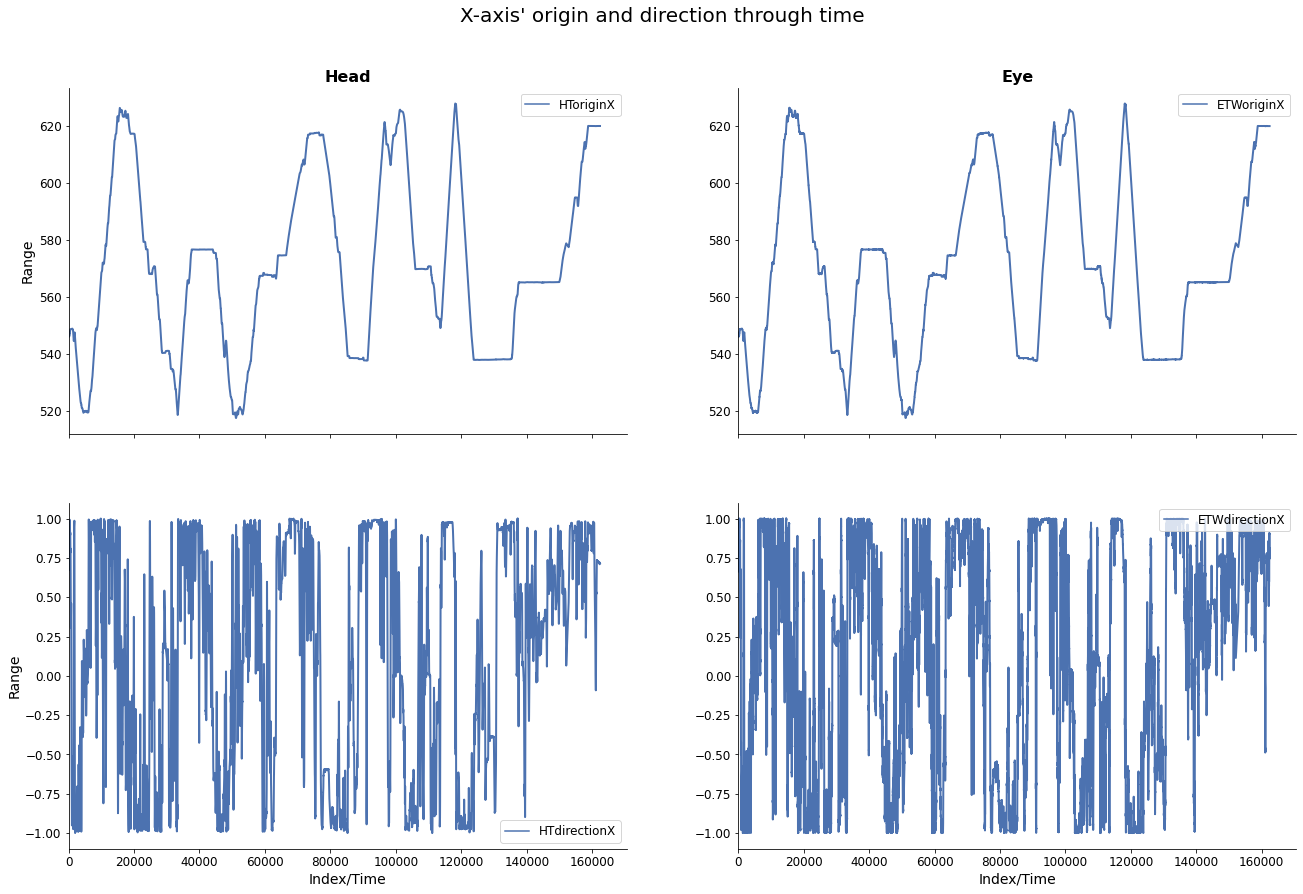

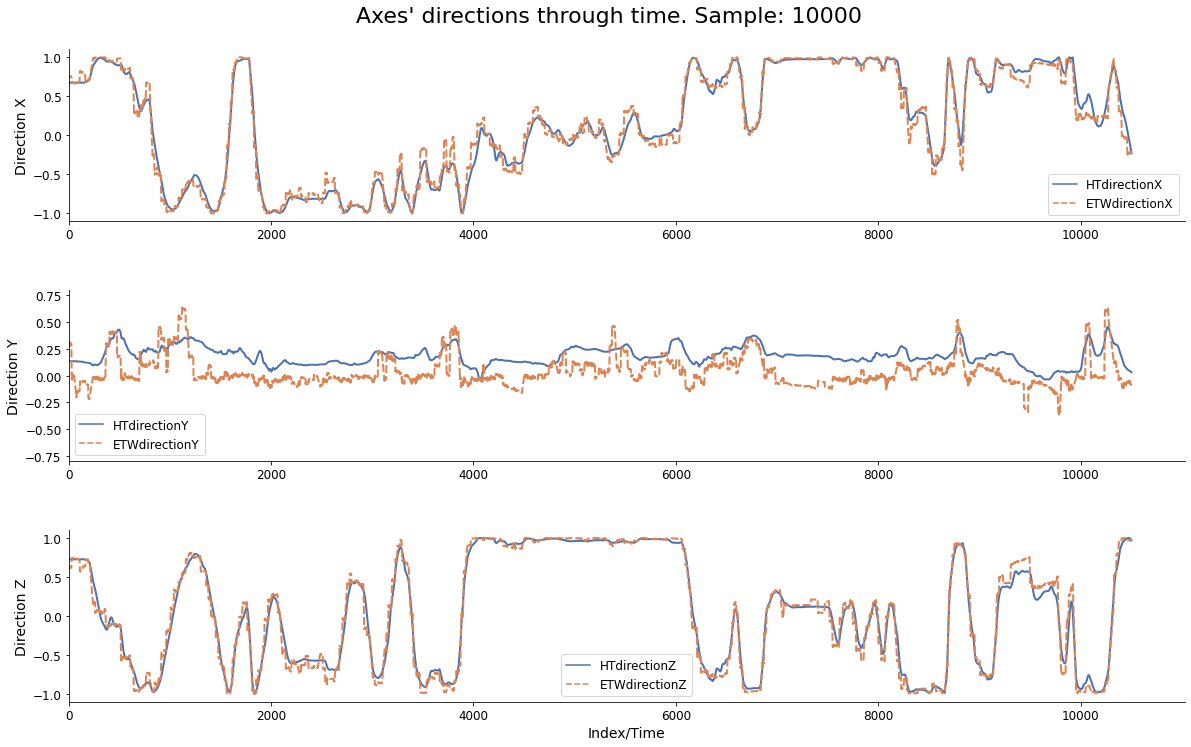

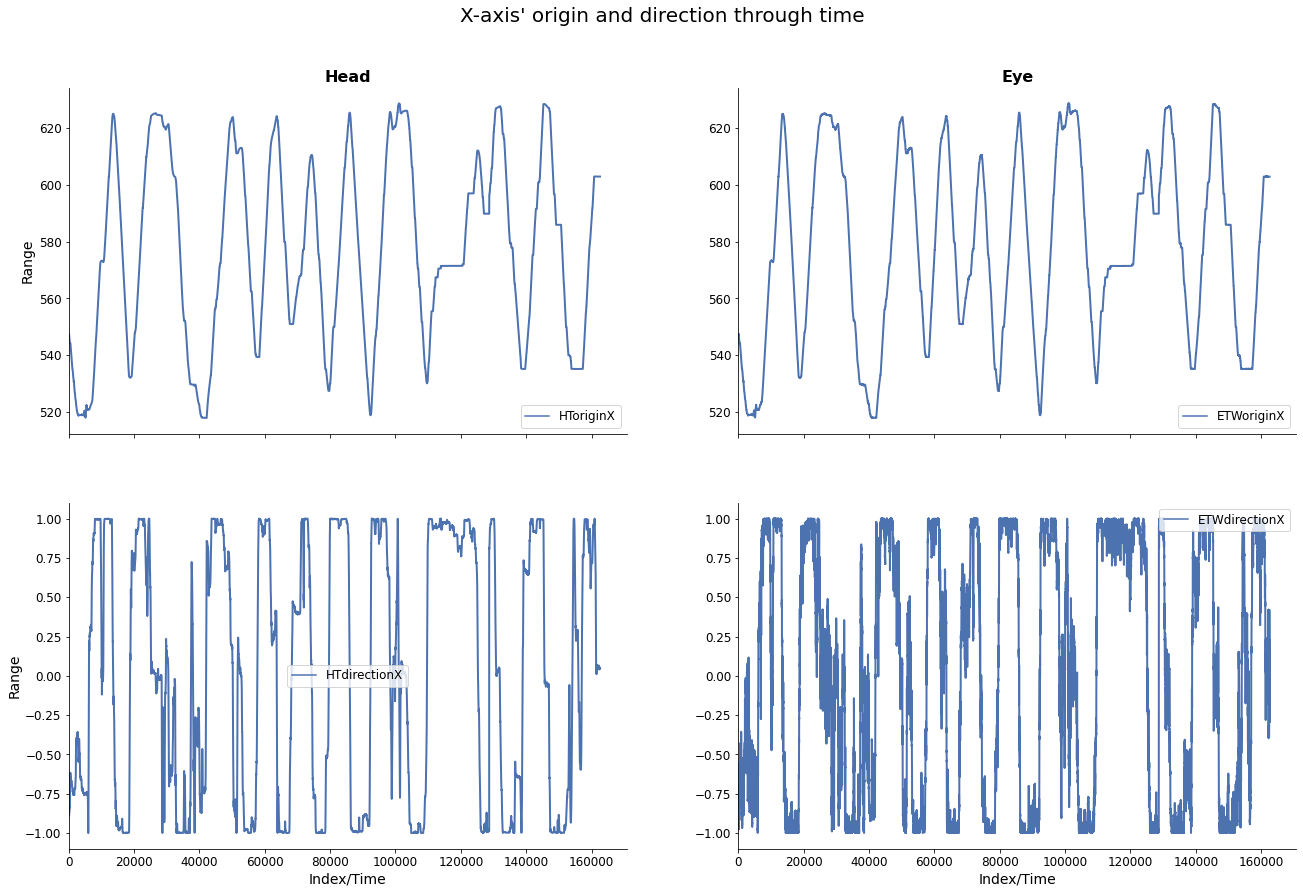

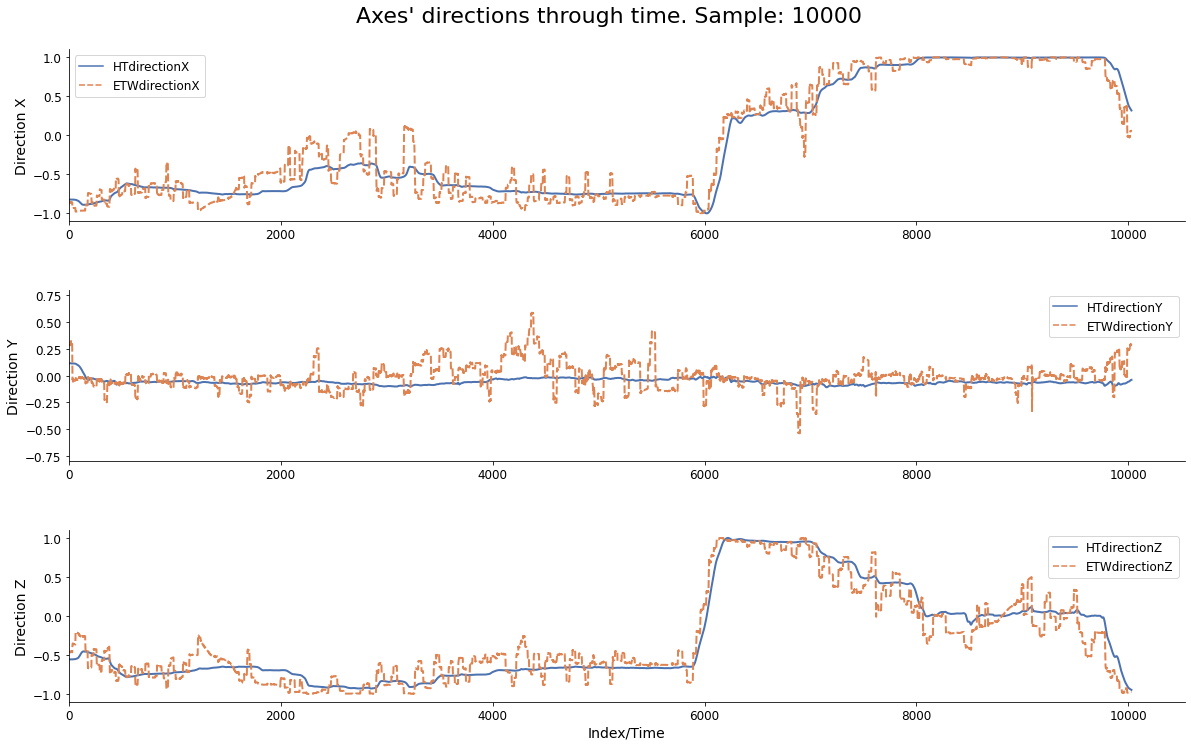

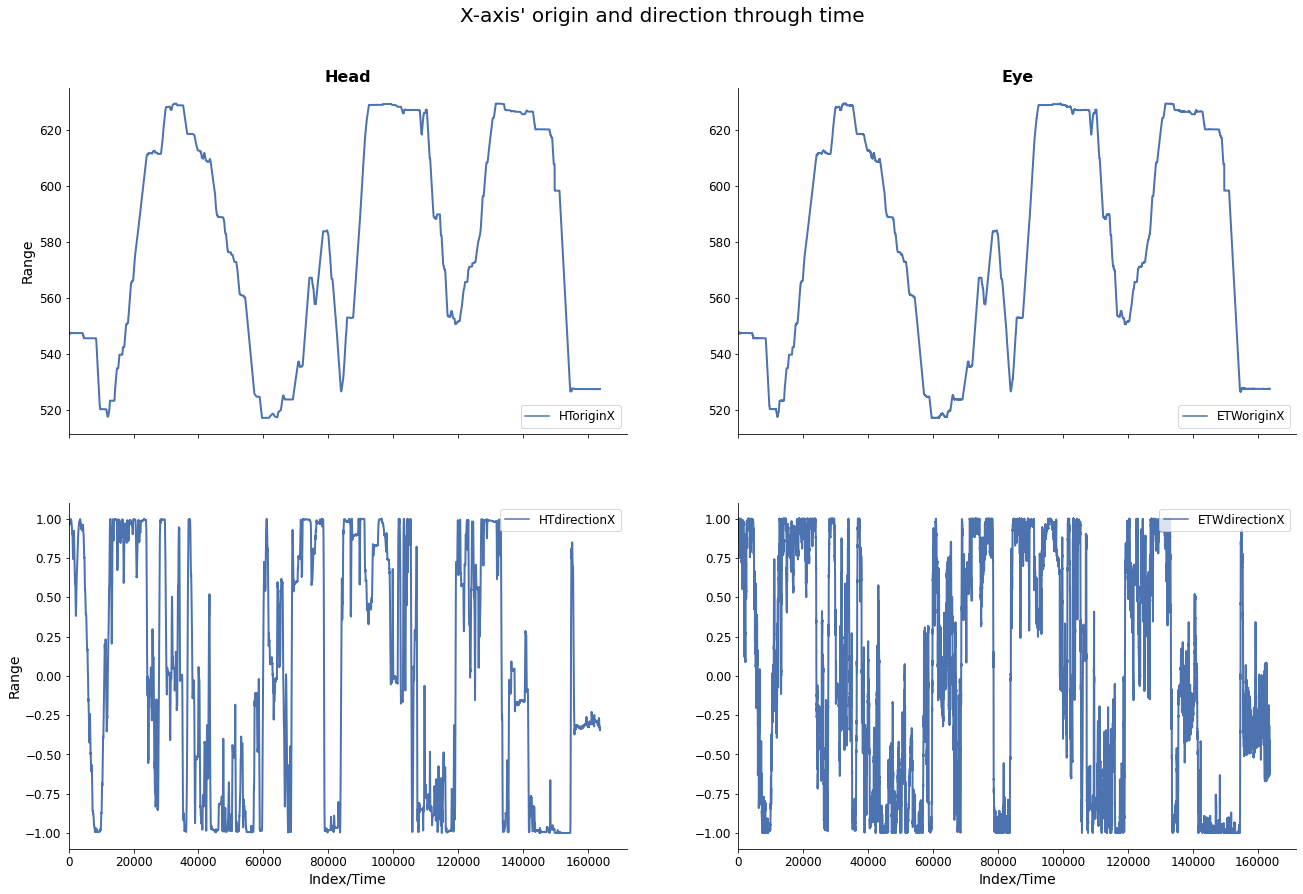

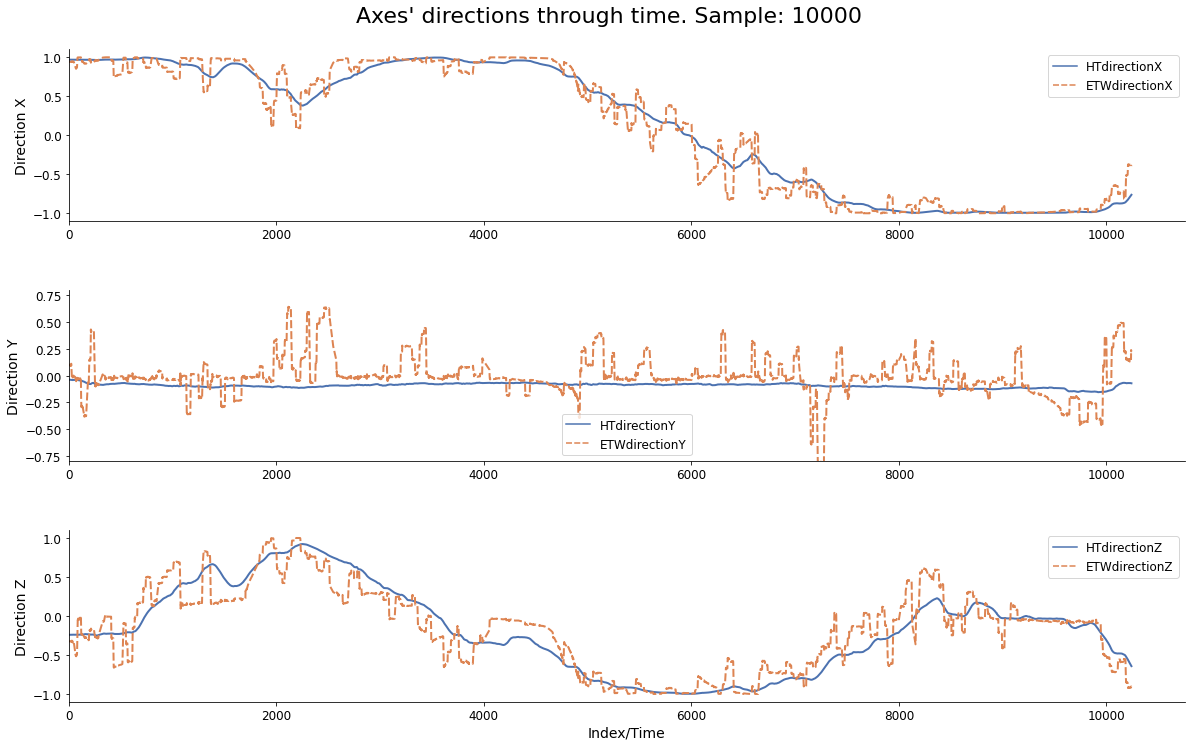

In [111]:
for file in all_filenames:
    df = pd.read_csv(file)
    df_clean = rename_clean(df)
    vis_x_axis(df_clean, save=False)
    vis_direction_relational(df_clean, save=False, sample=True)

In [92]:
# load individual dataset df; 0, 1, 2 etc ...
correTS_81 = pd.read_csv(all_filenames[2])
# load all datasets
df = pd.concat([pd.read_csv(file, delimiter=',') for file in all_filenames], ignore_index=True)

In [106]:
df_clean = df[df['ETWdirectionX'].notna() & df['xhpoo'].notna() & df['ETLdirectionX'].notna().reset_index(drop=True)]
# file contains no NaN
# df_clean.isnull().sum()
df_clean

,Unnamed: 0,time,ETWdirectionX,ETWdirectionY,ETWdirectionZ,ETWoriginX,ETWoriginY,ETWoriginZ,ETLdirectionX,ETLdirectionY,...,thresh,HT_thresh,isFix,HT_isFix,corrected_vel,events,length,distance,avg_dist,names
0,0,0.000,0.760821,0.258788,0.619537,547.49610,2.003454,588.82540,0.135025,0.000000,...,93.315047,97.903038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.014,0.760821,0.258788,0.619537,547.49610,2.003454,588.82540,0.135025,0.000000,...,93.315047,97.903038,0.0,0.0,0.000000,2.0,0.105,33.657031,33.675309,store2
2,2,0.016,0.760821,0.258788,0.619537,547.49610,2.003454,588.82540,0.135025,0.000000,...,93.315047,97.903038,0.0,0.0,0.000000,NaN,0.105,33.657031,33.675309,store2
3,3,0.078,0.760821,0.258788,0.619537,547.49610,2.003454,588.82540,0.135025,0.063370,...,93.315047,97.903038,0.0,0.0,0.000000,NaN,0.105,33.657031,33.675309,store2
4,4,0.079,0.760821,0.258788,0.619537,547.49610,2.003454,588.82540,0.135025,0.063370,...,93.315047,97.903038,0.0,0.0,0.000000,NaN,0.105,33.657031,33.675309,store2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488607,163651,2806.947,-0.465525,0.053999,-0.884111,527.39570,2.039758,593.38170,0.140884,0.020569,...,0.000000,0.000000,NaN,NaN,4.283954,NaN,607.163,44.399606,35.865583,Terrain
488608,163652,2806.958,-0.466018,0.055140,-0.883809,527.39575,2.039808,593.38184,0.140656,0.021255,...,0.000000,0.000000,NaN,NaN,6.674671,NaN,607.163,44.353795,35.865583,Terrain
488609,163653,2806.969,-0.388782,0.076406,-0.919556,527.39570,2.040012,593.38245,0.054550,0.033539,...,0.000000,0.000000,NaN,NaN,379.524815,NaN,607.163,53.198043,35.865583,Terrain
488610,163654,2806.980,-0.349532,0.084078,-0.934805,527.39500,2.039536,593.38130,0.011353,0.037384,...,0.000000,0.000000,NaN,NaN,199.927169,NaN,607.163,59.185550,35.865583,Terrain


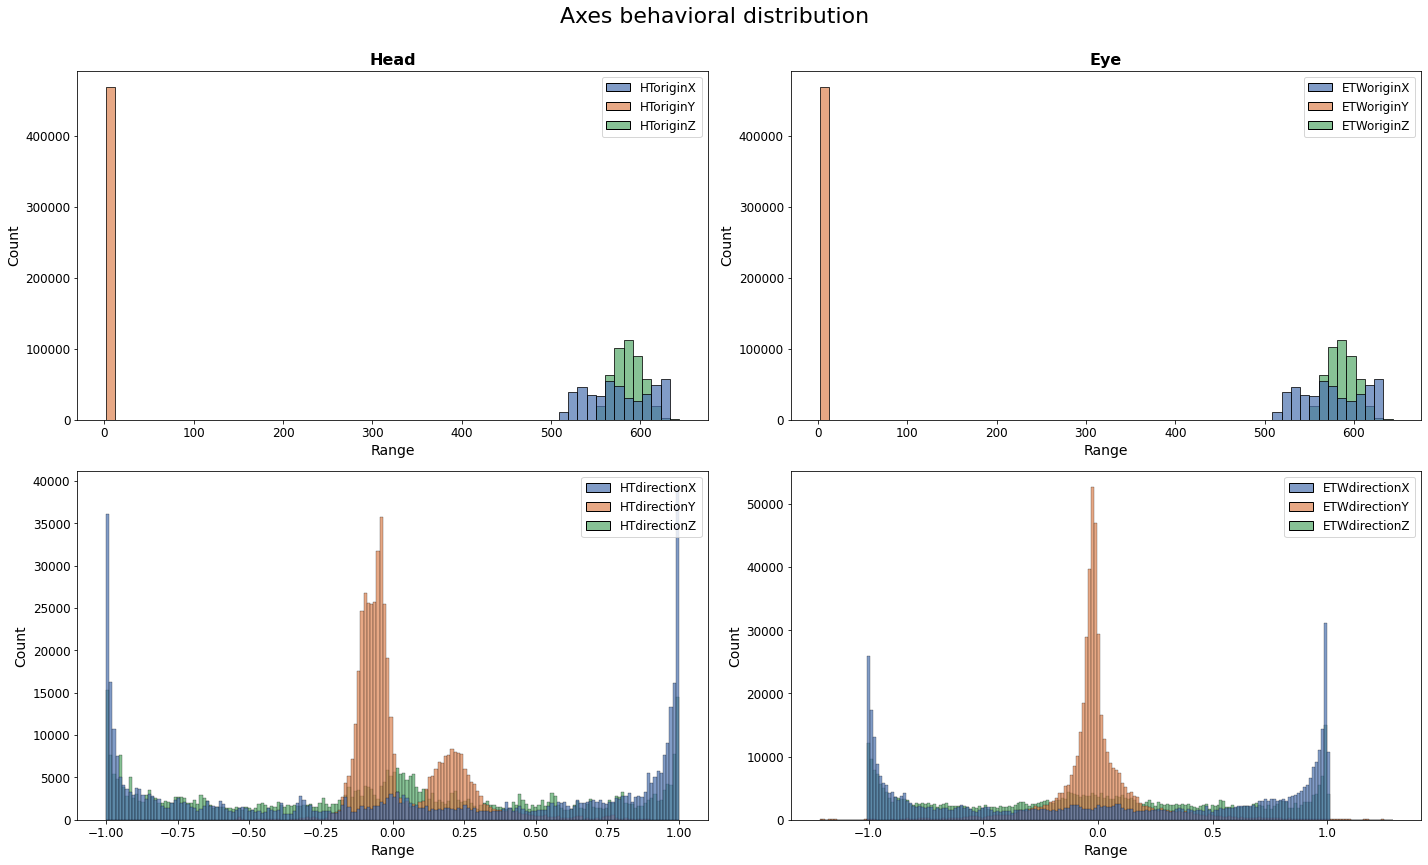

In [104]:
vis_count_distr(df_clean, include_eye_local=False, save=False)

In [ ]:
vis_x_axis(df, save=False)

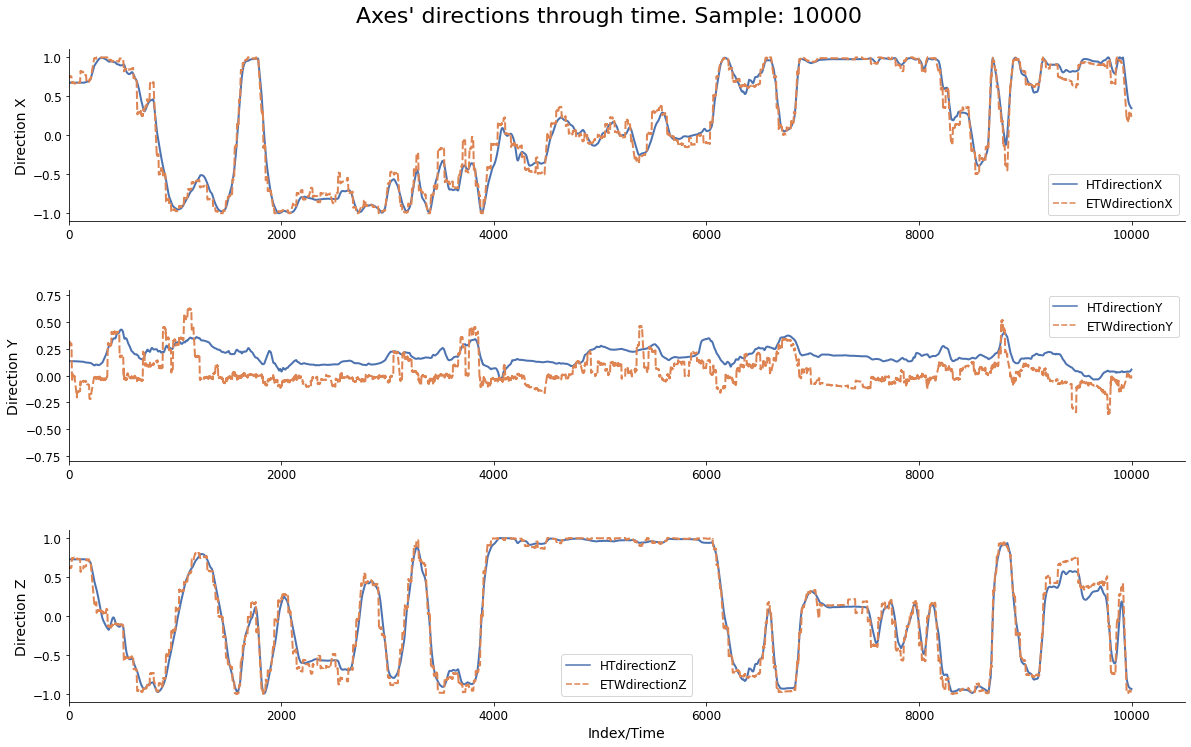

In [105]:
vis_direction_relational(df, save=False, sample=True)